In [4]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image
import seaborn as sns
import statistics
import math
import pickle 
import concurrent.futures
from multiprocessing import Process, Manager, Lock
import re
import os

### Sigma_mut vs Sigma_mat

In [212]:
folder_path = '/home/usriniva/uller_modified/discrete_time/param_expl/different_sigma_alphas'
phrase = 'mut_mat'  # only include links/files with this phrase

filtered_links = []

for filename in os.listdir(folder_path):
    if phrase.lower() in filename.lower():
        full_path = os.path.join(folder_path, filename)
        filtered_links.append(full_path)

# Output matching "links"
for link in filtered_links:
    print(link)


/home/usriniva/uller_modified/discrete_time/param_expl/different_sigma_alphas/results_sigma_mut_mat_alpha0.001_sp0.9_gamma1.pkl
/home/usriniva/uller_modified/discrete_time/param_expl/different_sigma_alphas/results_sigma_mut_mat_alpha0.0001_sp0.9_gamma1.pkl
/home/usriniva/uller_modified/discrete_time/param_expl/different_sigma_alphas/results_sigma_mut_mat_alpha0.01_sp0.9_gamma1.pkl
/home/usriniva/uller_modified/discrete_time/param_expl/different_sigma_alphas/results_sigma_mut_mat_alpha0.1_sp0.9_gamma1.pkl


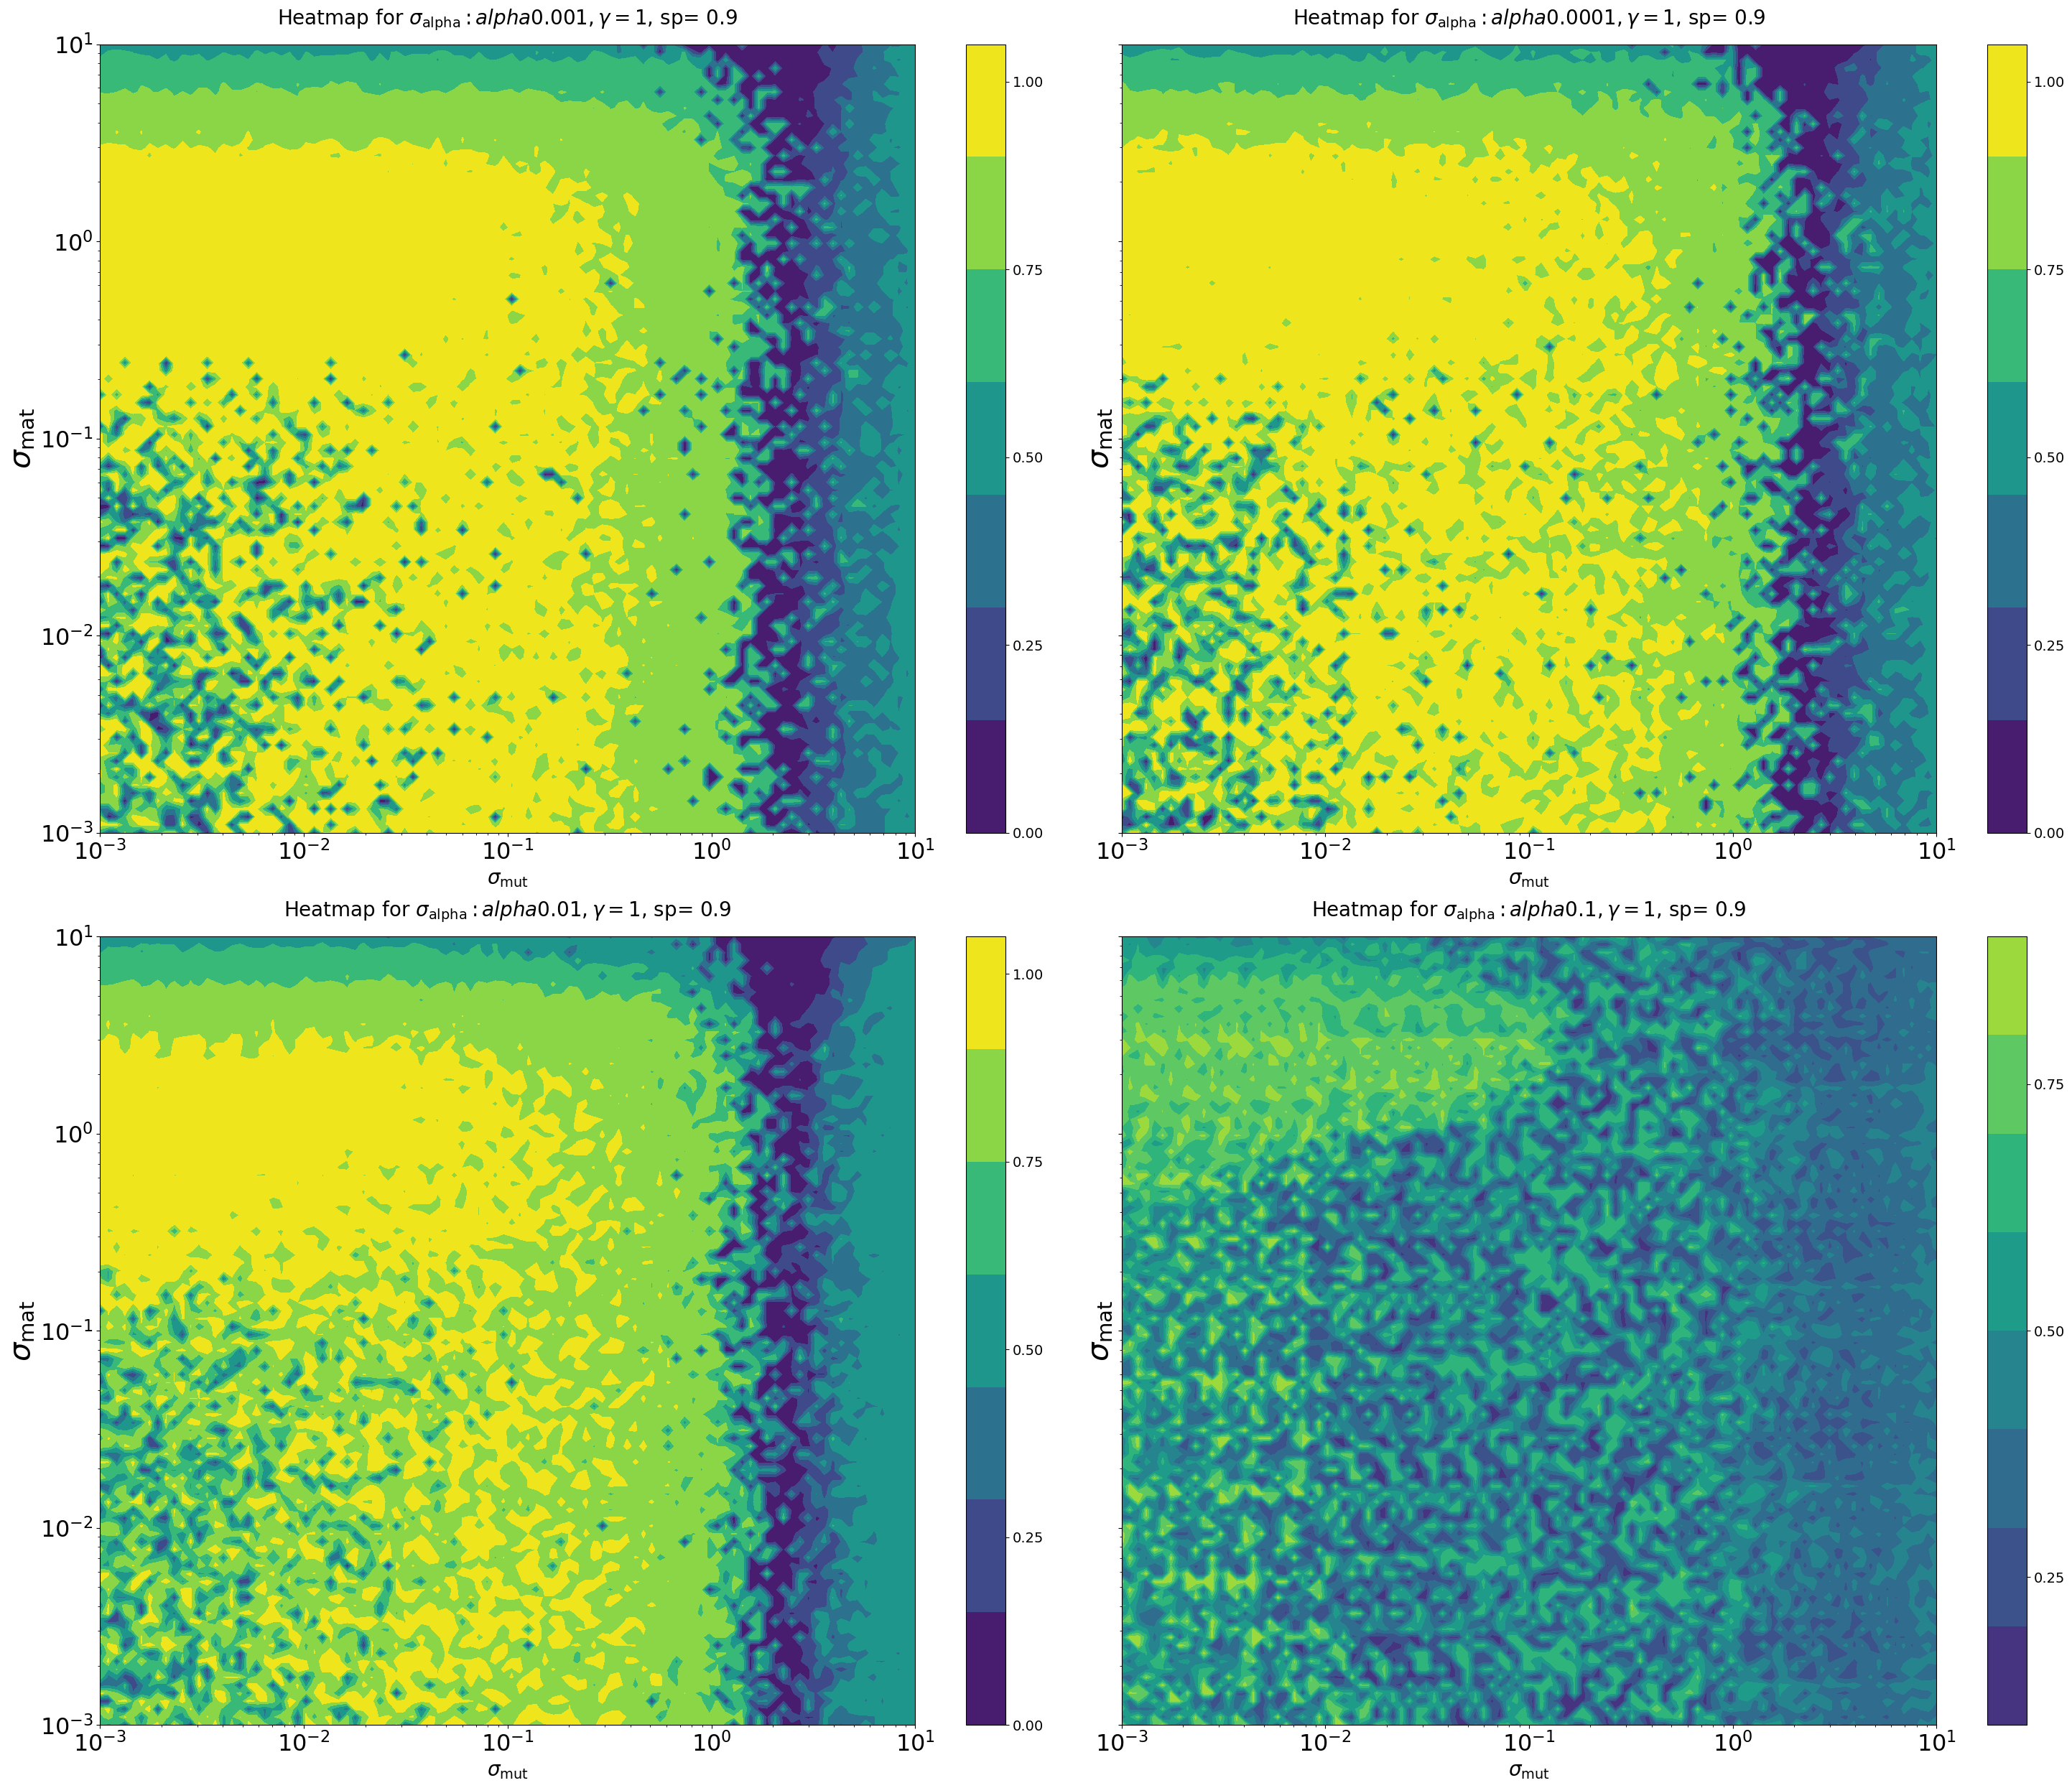

In [213]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (30,25),sharey=True)

# Flatten axes array for easy iteration
axes = axes.flat 

# Loop through each matching file and plot heatmap
for ax, file_path in zip(axes, filtered_links):
 
    
    # Load the pickled data
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
        
    df = pd.DataFrame(data)

    # Pivot the DataFrame for heatmap
    pivoted_df = df.pivot_table(
        index='Sigma_mut',
        columns='Sigma_mat',
        values='Alpha'
    ).sort_index().sort_index(axis=1)

    # Get axes and values
    x_vals = df['Sigma_mut'].unique()
    y_vals = df['Sigma_mat'].unique()
    z_vals = pivoted_df.values.T

   
    # Build title with filename info (e.g., sigma_mat value from filename)
    filename = os.path.basename(file_path)
    match = re.search(r'alpha([0-9.]+)', filename)
    sigma_value = match[0]
    title = rf"Heatmap for $\sigma_{{\mathrm{{alpha}}}}: {sigma_value}, \gamma =1$, sp= 0.9"

    # Plot
    X, Y = np.meshgrid(x_vals, y_vals)
    contour = ax.contourf(X, Y, z_vals, cmap='viridis', vmin=0, vmax=1)
    cbar = plt.colorbar(contour, ax=ax, ticks=[0.0, 0.25, 0.5, 0.75, 1.0])
    cbar.ax.tick_params(labelsize=14)  
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.tick_params(axis='both', which='major', labelsize=23)
    ax.set_xlabel(r'$\sigma_{{\mathrm{{mut}}}}$', fontsize=20)
    ax.set_ylabel(r'$\sigma_{{\mathrm{{mat}}}}$', fontsize=30)
    ax.set_title(title, pad=20, fontsize=20)

plt.tight_layout()
plt.show()

#### sp =0.7

In [284]:
folder_path = '/home/usriniva/uller_modified/discrete_time/param_expl/different_sigma_alphas_sp0.7'
phrase = 'mut_mat'  # only include lfiles with this phrase

filtered_links = []

for filename in os.listdir(folder_path):
    if phrase.lower() in filename.lower():
        full_path = os.path.join(folder_path, filename)
        filtered_links.append(full_path)

# Output matching links
for link in filtered_links:
    print(link)

/home/usriniva/uller_modified/discrete_time/param_expl/different_sigma_alphas_sp0.7/results_sigma_mut_mat_alpha0.01_sp0.7_gamma1.pkl
/home/usriniva/uller_modified/discrete_time/param_expl/different_sigma_alphas_sp0.7/results_sigma_mut_mat_alpha0.0001_sp0.7_gamma1.pkl
/home/usriniva/uller_modified/discrete_time/param_expl/different_sigma_alphas_sp0.7/results_sigma_mut_mat_alpha0.1_sp0.7_gamma1.pkl
/home/usriniva/uller_modified/discrete_time/param_expl/different_sigma_alphas_sp0.7/results_sigma_mut_mat_alpha0.001_sp0.7_gamma1.pkl


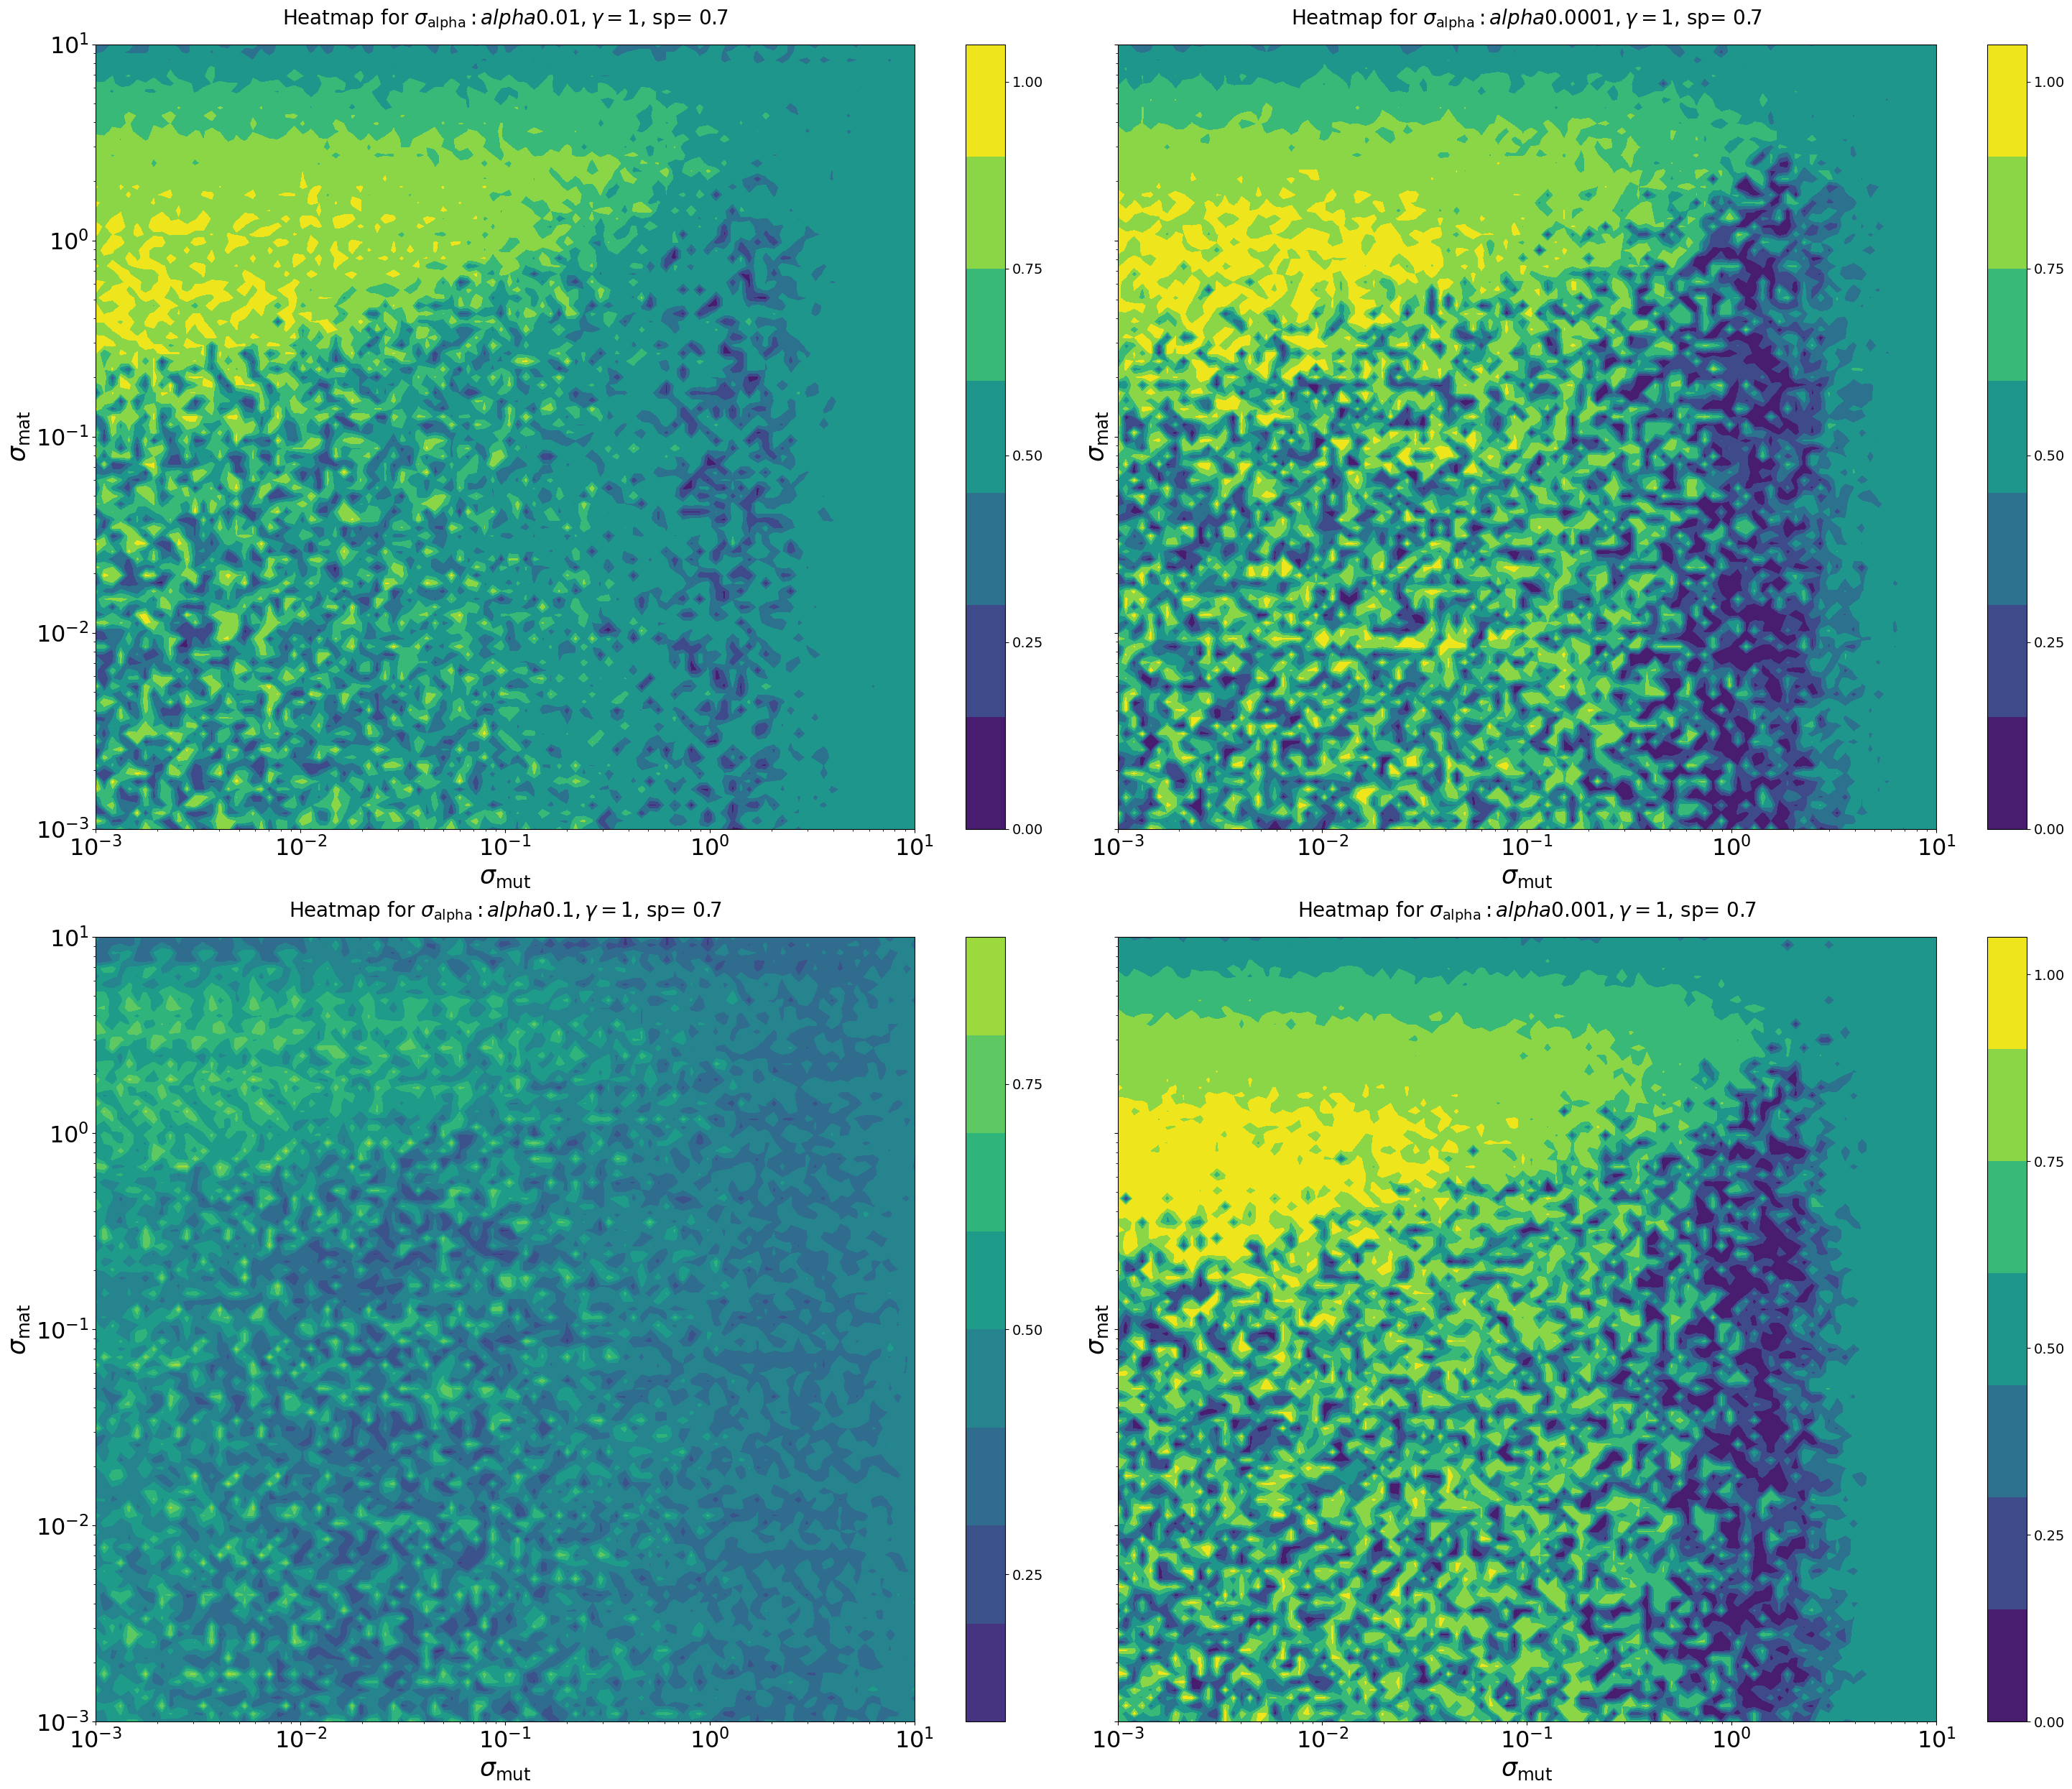

In [285]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (30,25),sharey=True)

# Flatten axes array for easy iteration
axes = axes.flat 

# Loop through each matching file and plot heatmap
for ax, file_path in zip(axes, filtered_links):
 
    
    # Load the pickled data
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
        
    df = pd.DataFrame(data)

    # Pivot the DataFrame for heatmap
    pivoted_df = df.pivot_table(
        index='Sigma_mut',
        columns='Sigma_mat',
        values='Alpha'
    ).sort_index().sort_index(axis=1)

    # Get axes and values
    x_vals = df['Sigma_mut'].unique()
    y_vals = df['Sigma_mat'].unique()
    z_vals = pivoted_df.values.T

   
    # Build title with filename info (e.g., sigma_mat value from filename)
    filename = os.path.basename(file_path)
    match = re.search(r'alpha([0-9.]+)', filename)
    sigma_value = match[0]
    title = rf"Heatmap for $\sigma_{{\mathrm{{alpha}}}}: {sigma_value}, \gamma =1$, sp= 0.7"

    # Plot
    X, Y = np.meshgrid(x_vals, y_vals)
    contour = ax.contourf(X, Y, z_vals, cmap='viridis', vmin=0, vmax=1)
    cbar = plt.colorbar(contour, ax=ax, ticks=[0.0, 0.25, 0.5, 0.75, 1.0])
    cbar.ax.tick_params(labelsize=14)  
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.tick_params(axis='both', which='major', labelsize=23)
    ax.set_xlabel(r'$\sigma_{{\mathrm{{mut}}}}$', fontsize=25)
    ax.set_ylabel(r'$\sigma_{{\mathrm{{mat}}}}$', fontsize=25)
    ax.set_title(title, pad=20, fontsize=20)

plt.tight_layout()
plt.show()

#### sp =0.1

In [282]:
folder_path = '/home/usriniva/uller_modified/discrete_time/param_expl/different_sigma_alphas_sp0.1_1'
phrase = 'mut_mat'  # only include lfiles with this phrase

filtered_links = []

for filename in os.listdir(folder_path):
    if phrase.lower() in filename.lower():
        full_path = os.path.join(folder_path, filename)
        filtered_links.append(full_path)

# Output matching links
for link in filtered_links:
    print(link)


/home/usriniva/uller_modified/discrete_time/param_expl/different_sigma_alphas_sp0.1_1/results_sigma_mut_mat_alpha0.1_sp0.1_gamma1.pkl
/home/usriniva/uller_modified/discrete_time/param_expl/different_sigma_alphas_sp0.1_1/results_sigma_mut_mat_alpha0.01_sp0.1_gamma1.pkl
/home/usriniva/uller_modified/discrete_time/param_expl/different_sigma_alphas_sp0.1_1/results_sigma_mut_mat_alpha0.001_sp0.1_gamma1.pkl
/home/usriniva/uller_modified/discrete_time/param_expl/different_sigma_alphas_sp0.1_1/results_sigma_mut_mat_alpha0.0001_sp0.1_gamma1.pkl


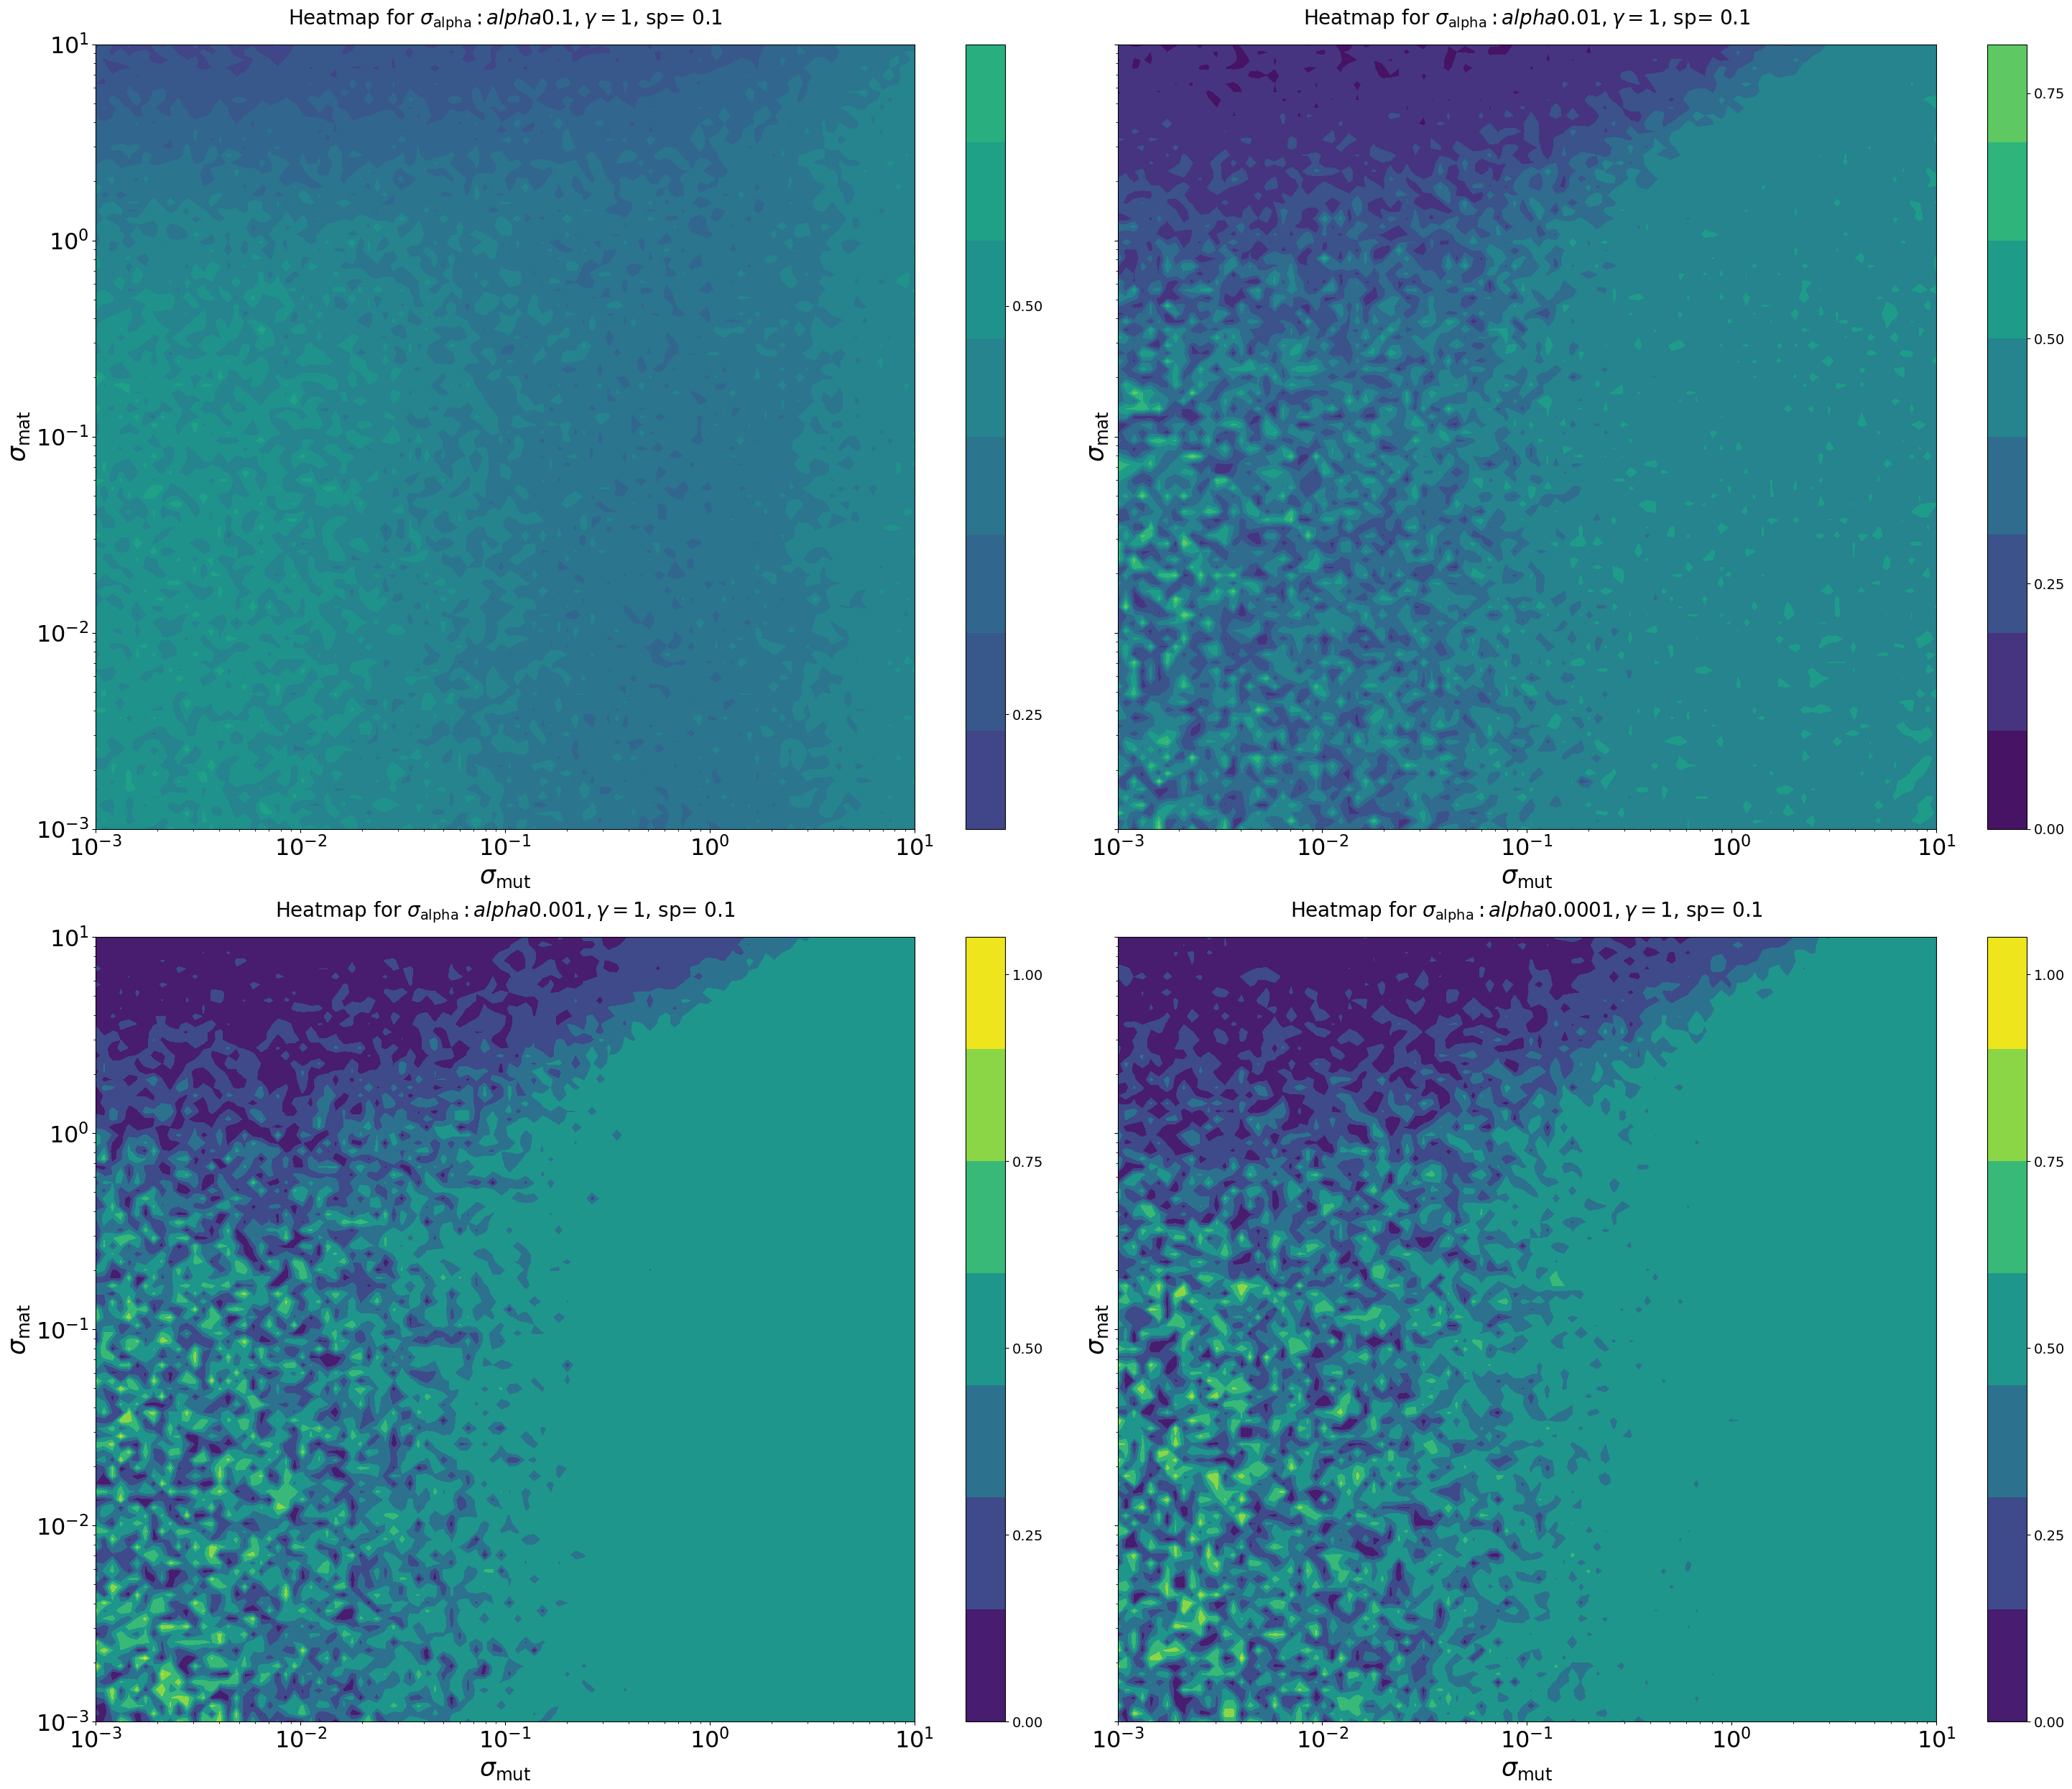

In [283]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (30,25),sharey=True)

# Flatten axes array for easy iteration
axes = axes.flat 

# Loop through each matching file and plot heatmap
for ax, file_path in zip(axes, filtered_links):
 
    
    # Load the pickled data
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
        
    df = pd.DataFrame(data)

    # Pivot the DataFrame for heatmap
    pivoted_df = df.pivot_table(
        index='Sigma_mut',
        columns='Sigma_mat',
        values='Alpha'
    ).sort_index().sort_index(axis=1)

    # Get axes and values
    x_vals = df['Sigma_mut'].unique()
    y_vals = df['Sigma_mat'].unique()
    z_vals = pivoted_df.values.T

   
    # Build title with filename info (e.g., sigma_mat value from filename)
    filename = os.path.basename(file_path)
    match = re.search(r'alpha([0-9.]+)', filename)
    sigma_value = match[0]
    title = rf"Heatmap for $\sigma_{{\mathrm{{alpha}}}}: {sigma_value}, \gamma =1$, sp= 0.1"

    # Plot
    X, Y = np.meshgrid(x_vals, y_vals)
    contour = ax.contourf(X, Y, z_vals, cmap='viridis', vmin=0, vmax=1)
    cbar = plt.colorbar(contour, ax=ax, ticks=[0.0, 0.25, 0.5, 0.75, 1.0])
    cbar.ax.tick_params(labelsize=14)  
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.tick_params(axis='both', which='major', labelsize=23)
    ax.set_xlabel(r'$\sigma_{{\mathrm{{mut}}}}$', fontsize=25)
    ax.set_ylabel(r'$\sigma_{{\mathrm{{mat}}}}$', fontsize=25)
    ax.set_title(title, pad=20, fontsize=20)

plt.tight_layout()
plt.show()

### sigma_mut vs gamma

In [260]:
folder_path= '/home/usriniva/uller_modified/discrete_time/param_expl'
filename = 'results_sigma_mut_vs_gamma_sigma_mat0.1_sp0.9.pkl'
full_path = os.path.join(folder_path, filename)
results = pickle.load(open(full_path, 'rb')) # Opens the file located at full_path in binary read mode ('rb')

In [261]:
mut_mat_df=pd.DataFrame(results)
print(mut_mat_df.head())

   sigma_mut     gamma     Alpha  Alpha_stdev
0      0.001  0.000000  0.573655     0.030933
1      0.001  0.010101  0.251191     0.036934
2      0.001  0.020202  0.583168     0.019521
3      0.001  0.030303  0.017542     0.014059
4      0.001  0.040404  0.256011     0.022006


In [262]:

mut_mat_pivoted_df=mut_mat_df.pivot_table(
        index='sigma_mut',       # y-axis
        columns='gamma',     # x-axis
        values='Alpha'
    ).sort_index().sort_index(axis=1)

mut_mat_pivoted_df.head()

gamma,0.000000,0.010101,0.020202,0.030303,0.040404,0.050505,0.060606,0.070707,0.080808,0.090909,...,0.909091,0.919192,0.929293,0.939394,0.949495,0.959596,0.969697,0.979798,0.989899,1.000000
sigma_mut,,,,,,,,,,,,,,,,,,,,,
0.001000,0.573655,0.251191,0.583168,0.017542,0.256011,0.846730,0.132718,0.220708,0.874890,0.653991,...,0.038853,0.882732,0.980329,0.514649,0.081381,0.976039,0.027762,0.978853,0.990247,0.813316
0.001097,0.188029,0.924778,0.190723,0.243149,0.550416,0.443064,0.193243,0.038708,0.673917,0.049007,...,0.699143,0.071207,0.807703,0.984126,0.038402,0.258031,0.753356,0.988736,0.994513,0.130298
0.001205,0.917506,0.373072,0.204753,0.372851,0.600956,0.151715,0.525424,0.437463,0.837395,0.328828,...,0.914900,0.430825,0.906729,0.161117,0.920269,0.975958,0.945964,0.111236,0.674310,0.911449
0.001322,0.537928,0.111827,0.541436,0.546089,0.278197,0.317607,0.896637,0.693702,0.648436,0.312043,...,0.027384,0.981843,0.369965,0.958619,0.977157,0.766695,0.593166,0.589735,0.983499,0.914420
0.001451,0.074605,0.298011,0.205569,0.361198,0.347120,0.018820,0.769962,0.521831,0.514767,0.318724,...,0.951668,0.960284,0.779977,0.287640,0.961970,0.871843,0.840669,0.974036,0.152513,0.852063


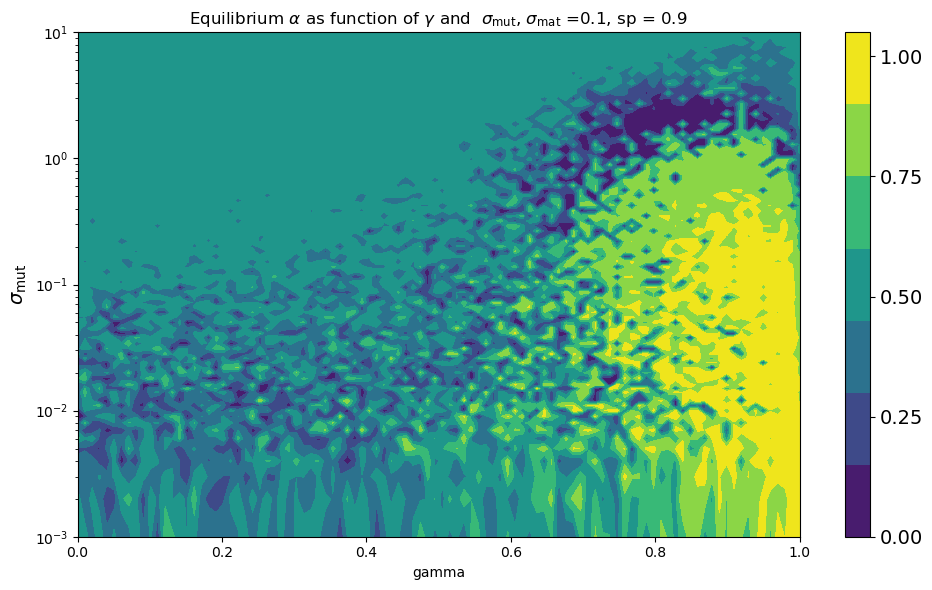

In [275]:
plt.figure(figsize=(10, 6))
    
# Create contour plot
X = mut_mat_pivoted_df.columns.values  
Y = mut_mat_pivoted_df.index.values    

Z =  mut_mat_pivoted_df.values

title = rf'Equilibrium $\alpha$ as function of $\gamma$ and  $\sigma_{{\mathrm{{mut}}}}$, $\sigma_{{\mathrm{{mat}}}}$ =0.1, sp = 0.9'
# Create meshgrid
X_mesh, Y_mesh = np.meshgrid(X, Y)
    
contour = plt.contourf(X_mesh, Y_mesh, Z, cmap='viridis', vmin=0, vmax=1)

cbar = plt.colorbar(contour, ticks=[0.0, 0.25, 0.5, 0.75, 1.0])
cbar.ax.tick_params(labelsize=14)

#plt.xscale('log')
plt.yscale('log')
plt.xlabel('gamma')
plt.ylabel(r'$\sigma_{\mathrm{mut}}$', fontsize=14)
plt.title(title)
plt.tight_layout()
plt.show()

### sigma_mut vs sp

In [264]:
folder_path= '/home/usriniva/uller_modified/discrete_time/param_expl'
filename = 'results_sigma_mut_vs_sp_sigma_mat0.1_gamma1.pkl'
full_path = os.path.join(folder_path, filename)
results = pickle.load(open(full_path, 'rb')) # Opens the file located at full_path in binary read mode ('rb')

In [265]:
mut_mat_df=pd.DataFrame(results)
print(mut_mat_df.head())

   sigma_mut        sp     Alpha  Alpha_stdev
0      0.001  0.000000  0.447984     0.020548
1      0.001  0.010101  0.674759     0.041792
2      0.001  0.020202  0.073948     0.020222
3      0.001  0.030303  0.547336     0.019701
4      0.001  0.040404  0.248457     0.028301


In [266]:

mut_mat_pivoted_df=mut_mat_df.pivot_table(
        index='sigma_mut',       # y-axis
        columns='sp',     # x-axis
        values='Alpha'
    ).sort_index().sort_index(axis=1)

mut_mat_pivoted_df.head()

sp,0.000000,0.010101,0.020202,0.030303,0.040404,0.050505,0.060606,0.070707,0.080808,0.090909,...,0.909091,0.919192,0.929293,0.939394,0.949495,0.959596,0.969697,0.979798,0.989899,1.000000
sigma_mut,,,,,,,,,,,,,,,,,,,,,
0.001,0.490459,0.511227,0.365314,0.557533,0.324371,0.490251,0.314391,0.391228,0.599087,0.330745,...,0.871664,0.757475,0.699232,0.877908,0.960955,0.706125,0.975464,0.893852,0.984641,0.989877
0.002,0.524621,0.304417,0.531684,0.363892,0.220029,0.204048,0.563724,0.669076,0.504316,0.183606,...,0.867538,0.812080,0.787797,0.836968,0.941418,0.864515,0.840139,0.849366,0.992910,0.983900
0.003,0.335517,0.350536,0.346798,0.469594,0.364094,0.474357,0.481000,0.300746,0.458458,0.518250,...,0.951974,0.807215,0.907714,0.797431,0.838453,0.970835,0.926566,0.972919,0.984550,0.976757
0.004,0.360944,0.372763,0.367738,0.238767,0.172145,0.504018,0.051934,0.313402,0.177436,0.513115,...,0.946238,0.473939,0.883418,0.978165,0.984481,0.808658,0.972119,0.952909,0.958173,0.957907
0.005,0.240595,0.280721,0.163538,0.136817,0.337806,0.585052,0.225729,0.616383,0.368004,0.533079,...,0.902998,0.972739,0.735261,0.819451,0.976901,0.986589,0.954001,0.953857,0.979349,0.948956


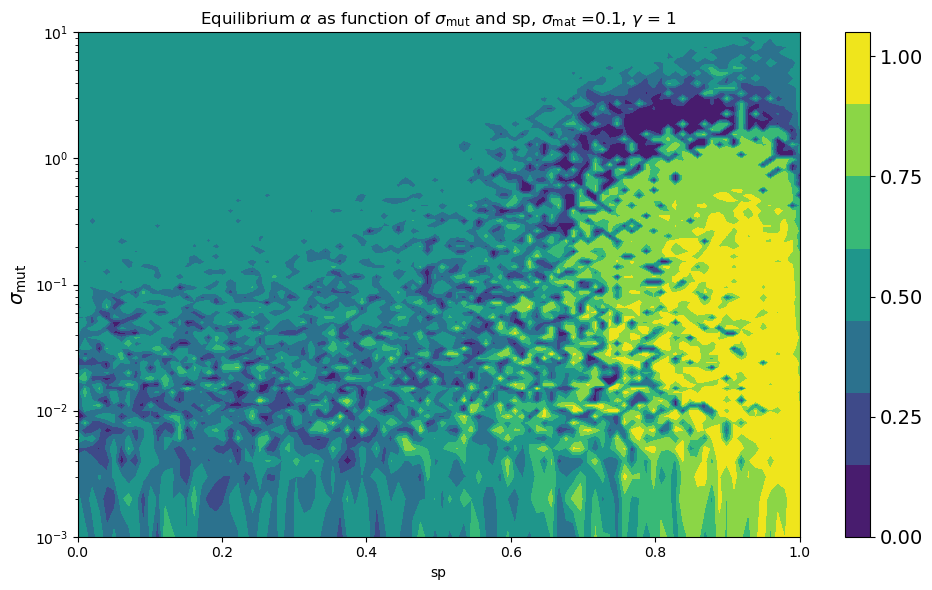

In [276]:
plt.figure(figsize=(10, 6))
    
# Create contour plot
X = mut_mat_pivoted_df.columns.values  
Y = mut_mat_pivoted_df.index.values    

Z =  mut_mat_pivoted_df.values

title = rf'Equilibrium $\alpha$ as function of $\sigma_{{\mathrm{{mut}}}}$ and sp, $\sigma_{{\mathrm{{mat}}}}$ =0.1, $\gamma$ = 1'
# Create meshgrid
X_mesh, Y_mesh = np.meshgrid(X, Y)
    
contour = plt.contourf(X_mesh, Y_mesh, Z, cmap='viridis', vmin=0, vmax=1)

cbar = plt.colorbar(contour, ticks=[0.0, 0.25, 0.5, 0.75, 1.0])
cbar.ax.tick_params(labelsize=14)

#plt.xscale('log')
plt.yscale('log')
plt.xlabel('sp')
plt.ylabel(r'$\sigma_{\mathrm{mut}}$', fontsize=14)
plt.title(title)
plt.tight_layout()
plt.show()

### sp vs gamma

sigma_mat =0.1

In [245]:
folder_path= '/home/usriniva/uller_modified/discrete_time/param_expl'
filename = 'results_sp_vs_gamma_sigma_mut0.1_sigma_mat0.1.pkl'
full_path = os.path.join(folder_path, filename)
results = pickle.load(open(full_path, 'rb')) # Opens the file located at full_path in binary read mode ('rb')

In [246]:
mut_mat_df=pd.DataFrame(results)
print(mut_mat_df.head())

   gamma        sp     Alpha  Alpha_stdev
0    0.0  0.000000  0.915493     0.014062
1    0.0  0.020408  0.938315     0.014265
2    0.0  0.040816  0.455020     0.035596
3    0.0  0.061224  0.910597     0.014830
4    0.0  0.081633  0.658902     0.042506


In [257]:

mut_mat_pivoted_df=mut_mat_df.pivot_table(
        index='gamma',       # y-axis
        columns='sp',     # x-axis
        values='Alpha'
    ).sort_index().sort_index(axis=1)

mut_mat_pivoted_df.head()

sp,0.000000,0.020408,0.040816,0.061224,0.081633,0.102041,0.122449,0.142857,0.163265,0.183673,...,0.816327,0.836735,0.857143,0.877551,0.897959,0.918367,0.938776,0.959184,0.979592,1.000000
gamma,,,,,,,,,,,,,,,,,,,,,
0.000000,0.915493,0.938315,0.455020,0.910597,0.658902,0.485943,0.942275,0.532158,0.697650,0.367882,...,0.487659,0.044651,0.011373,0.110579,0.010207,0.095740,0.329287,0.299853,0.259853,0.074599
0.010101,0.948371,0.848573,0.866912,0.817958,0.922503,0.667374,0.815905,0.688767,0.627862,0.734440,...,0.130394,0.268193,0.041235,0.010348,0.410520,0.034173,0.106622,0.009441,0.095023,0.170688
0.020202,0.902095,0.926847,0.863496,0.942322,0.970524,0.723100,0.932960,0.498970,0.469957,0.903992,...,0.018381,0.108555,0.154227,0.031909,0.063432,0.186194,0.160111,0.039158,0.008783,0.055867
0.030303,0.757867,0.960234,0.390267,0.662287,0.637780,0.783995,0.953990,0.868373,0.665296,0.752643,...,0.170008,0.642889,0.207187,0.033354,0.220341,0.061353,0.362641,0.192574,0.048022,0.044309
0.040404,0.718477,0.675695,0.916416,0.941144,0.742407,0.978883,0.926144,0.720103,0.401910,0.588690,...,0.068918,0.114039,0.072345,0.105561,0.336606,0.022316,0.294215,0.022457,0.040877,0.243803


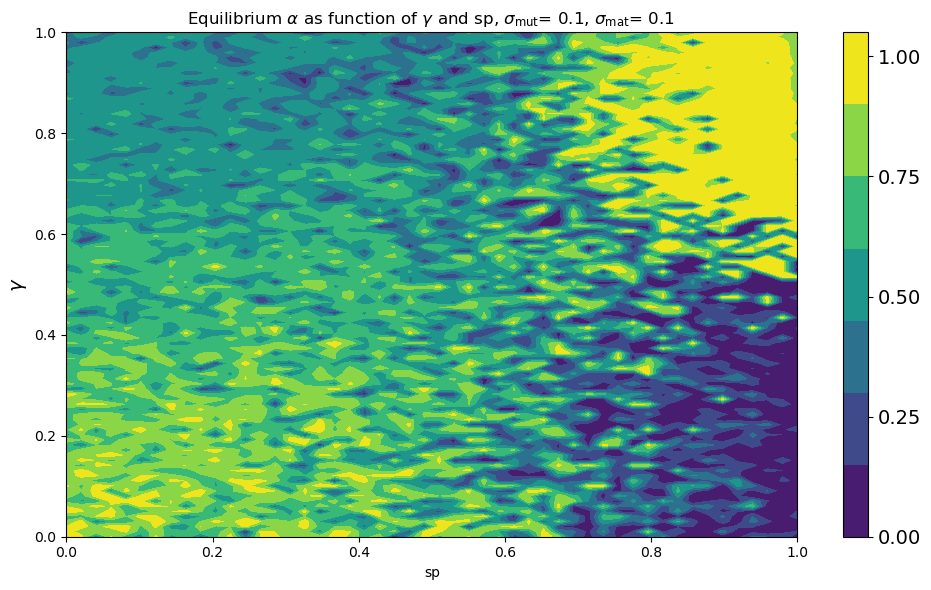

In [259]:
plt.figure(figsize=(10, 6))
    
# Create contour plot
X = mut_mat_pivoted_df.columns.values  
Y = mut_mat_pivoted_df.index.values    

Z =  mut_mat_pivoted_df.values

title = rf'Equilibrium $\alpha$ as function of $\gamma$ and sp, $\sigma_{{\mathrm{{mut}}}}$= 0.1, $\sigma_{{\mathrm{{mat}}}}$= 0.1 '
# Create meshgrid
X_mesh, Y_mesh = np.meshgrid(X, Y)
    
contour = plt.contourf(X_mesh, Y_mesh, Z, cmap='viridis', vmin=0, vmax=1)

cbar = plt.colorbar(contour, ticks=[0.0, 0.25, 0.5, 0.75, 1.0])
cbar.ax.tick_params(labelsize=14)

#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('sp')
plt.ylabel(r'$\gamma$', fontsize=14)
plt.title(title)
plt.tight_layout()
plt.show()

sigma_mat =0.01

In [278]:
folder_path= '/home/usriniva/uller_modified/discrete_time/param_expl'
filename = 'results_sp_vs_gamma_sigma_mut0.1_sigma_mat0.01.pkl'
full_path = os.path.join(folder_path, filename)
results = pickle.load(open(full_path, 'rb')) # Opens the file located at full_path in binary read mode ('rb')

In [279]:
mut_mat_df=pd.DataFrame(results)
print(mut_mat_df.head())

   gamma        sp     Alpha  Alpha_stdev
0    0.0  0.000000  0.940603     0.019039
1    0.0  0.010101  0.795332     0.025243
2    0.0  0.020202  0.606673     0.058716
3    0.0  0.030303  0.896677     0.055669
4    0.0  0.040404  0.943996     0.029653


In [280]:

mut_mat_pivoted_df=mut_mat_df.pivot_table(
        index='gamma',       # y-axis
        columns='sp',     # x-axis
        values='Alpha'
    ).sort_index().sort_index(axis=1)

mut_mat_pivoted_df.head()

sp,0.000000,0.010101,0.020202,0.030303,0.040404,0.050505,0.060606,0.070707,0.080808,0.090909,...,0.909091,0.919192,0.929293,0.939394,0.949495,0.959596,0.969697,0.979798,0.989899,1.000000
gamma,,,,,,,,,,,,,,,,,,,,,
0.000000,0.940603,0.795332,0.606673,0.896677,0.943996,0.942971,0.752898,0.825761,0.935802,0.786489,...,0.044787,0.031315,0.047816,0.022887,0.060221,0.020372,0.171416,0.069233,0.132888,0.040101
0.010101,0.927047,0.547182,0.588581,0.922301,0.951090,0.670862,0.962219,0.578714,0.653056,0.692822,...,0.166858,0.108130,0.015208,0.027383,0.023947,0.044672,0.034931,0.136636,0.124143,0.056839
0.020202,0.798836,0.950955,0.735632,0.930499,0.973070,0.961141,0.971428,0.968434,0.659684,0.941472,...,0.059517,0.165790,0.550614,0.309182,0.028522,0.170554,0.269310,0.075952,0.034097,0.065717
0.030303,0.964728,0.894414,0.794494,0.551047,0.854233,0.883817,0.907921,0.683770,0.970012,0.689208,...,0.163998,0.161487,0.187589,0.107168,0.041286,0.080479,0.034275,0.320293,0.180805,0.045317
0.040404,0.971102,0.979009,0.919206,0.648359,0.641896,0.967279,0.843592,0.856582,0.971238,0.778245,...,0.170820,0.415366,0.431344,0.040282,0.283936,0.027899,0.121514,0.007043,0.295053,0.032909


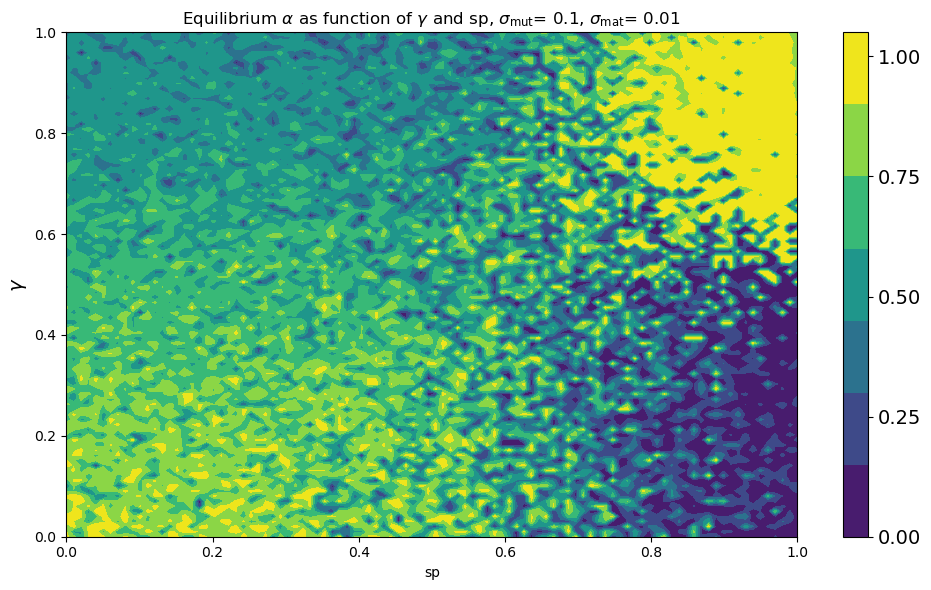

In [281]:
plt.figure(figsize=(10, 6))
    
# Create contour plot
X = mut_mat_pivoted_df.columns.values  
Y = mut_mat_pivoted_df.index.values    

Z =  mut_mat_pivoted_df.values

title = rf'Equilibrium $\alpha$ as function of $\gamma$ and sp, $\sigma_{{\mathrm{{mut}}}}$= 0.1, $\sigma_{{\mathrm{{mat}}}}$= 0.01 '
# Create meshgrid
X_mesh, Y_mesh = np.meshgrid(X, Y)
    
contour = plt.contourf(X_mesh, Y_mesh, Z, cmap='viridis', vmin=0, vmax=1)

cbar = plt.colorbar(contour, ticks=[0.0, 0.25, 0.5, 0.75, 1.0])
cbar.ax.tick_params(labelsize=14)

#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('sp')
plt.ylabel(r'$\gamma$', fontsize=14)
plt.title(title)
plt.tight_layout()
plt.show()

#### sigma_mut =0.01

In [2]:
folder_path= '/home/usriniva/uller_modified/discrete_time/param_expl'
filename = 'results_sp_vs_gamma_sigma_mut0.01_sigma_mat0.1.pkl'
full_path = os.path.join(folder_path, filename)
results = pickle.load(open(full_path, 'rb')) # Opens the file located at full_path in binary read mode ('rb')

NameError: name 'os' is not defined

In [ ]:
mut_mat_df=pd.DataFrame(results)
print(mut_mat_df.head())

In [ ]:

mut_mat_pivoted_df=mut_mat_df.pivot_table(
        index='gamma',       # y-axis
        columns='sp',     # x-axis
        values='Alpha'
    ).sort_index().sort_index(axis=1)

mut_mat_pivoted_df.head()

In [ ]:
plt.figure(figsize=(10, 6))
    
# Create contour plot
X = mut_mat_pivoted_df.columns.values  
Y = mut_mat_pivoted_df.index.values    

Z =  mut_mat_pivoted_df.values

title = rf'Equilibrium $\alpha$ as function of $\gamma$ and sp, $\sigma_{{\mathrm{{mut}}}}$= 0.01, $\sigma_{{\mathrm{{mat}}}}$= 0.1 '
# Create meshgrid
X_mesh, Y_mesh = np.meshgrid(X, Y)
    
contour = plt.contourf(X_mesh, Y_mesh, Z, cmap='viridis', vmin=0, vmax=1)

cbar = plt.colorbar(contour, ticks=[0.0, 0.25, 0.5, 0.75, 1.0])
cbar.ax.tick_params(labelsize=14)

#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('sp')
plt.ylabel(r'$\gamma$', fontsize=14)
plt.title(title)
plt.tight_layout()
plt.show()

In [ ]:

# Create 2D grid
rho = np.linspace(-1, 1, 100)
m = np.linspace(0, 1, 100)
RHO, M = np.meshgrid(rho, m)
ALPHA = (1 - RHO) * (1 - M)
BETA = (1-RHO)*M



In [ ]:


# Mask values > 1
ALPHA_MASKED = np.ma.masked_greater(ALPHA, 1)

# Colormap and normalization
cmap = plt.cm.viridis.copy()  # make a copy so you can safely modify
cmap.set_bad(color='gray')    # gray for masked values
norm = mcolors.Normalize(vmin=0.0, vmax=1.0)  # Force color scale to include 1

# Plot
plt.figure(figsize=(8, 6))
pcm = plt.pcolormesh(RHO, M, ALPHA_MASKED, cmap=cmap, norm=norm, shading='auto')
cbar = plt.colorbar(pcm, label=rf'$\alpha$', ticks=[0.0, 0.25, 0.5, 0.75, 1.0])
cbar.ax.tick_params(labelsize=14)

plt.xlabel('rho')
plt.ylabel('m')
plt.title('Alpha variation across rho and m (alpha > 1 in gray)')
plt.tight_layout()
plt.show()
